<h1 align="center">EXPLORE Data Science Academy Classification Hackathon</h1>


<img src="https://2.bp.blogspot.com/-y3C_S4kBIZE/Vq7pCGqGM7I/AAAAAAAAv3g/_xWOkAYKyr8/s1600/SA.jpg" width="1000" alt="Drawing" style="width: 2500px;" align="center"/>





<h1 align="center">Created by</h1>

<h1 align="center">Okon Prince</h1>

<h1 align="center">Supervisor: Mr. John Mohale</h2>

---
---
<a id="cont"></a>

## Table of Contents
---
---

<a href=#one>1. Predict Overview</a>

<a href=#two>2. Introduction</a>

<a href=#three>3. Problem Statement</a>

<a href=#four>4. Aims & Objectives</a>

<a href=#six>6. Importing Packages</a>

<a href=#seven>7. Loading Data</a>

<a href=#eight>8. Exploratory Data Analysis (EDA)</a>

<a href=#nine>9. Data Engineering</a>

<a href=#ten>10. Train - Test Split</a>

<a href=#eleven>11. Model Building</a>

<a href=#twelve>12. Model Explanation</a>

<a href=#fourteen>14. Conclusion</a>

<a id="one"></a>
## 1. Predict Overview
<a href=#cont>Back to Table of Contents</a>

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that is used for communinication. It enhances every humans social experience and also contribute to the cultural, intellectual, economic and political life of every South African.

South Africa is a multilingual Nation with 11 official languages, each of which is guaranteed equal status within the constitution of that country. Most South Africans are multilingual and are able to speak at least two or more of the official languages.

<img src="inbox_2205222_7f34544c1b1f61d1a5949bddacfd84a9_South_Africa_languages_2011 (1).jpg" width="1000" alt="Drawing" style="width: 2500px;" align="center"/>

From The South African Government

<a id="two"></a>
## 2. Introduction
<a href=#cont>Back to Table of Contents</a>

Considering the multicultural nature of the South African Population, it is very likely that their systems and devices also communicate in multiple languages so as to ensure proper representation and flexibilty of use in their soceities.

In this challenge, we will be provided with text content in any of South Africa's 11 Official languages and our task will be to build a model that will identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="three"></a>
## 3. Problem Statement 
<a href=#cont>Back to Table of Contents</a>

**To build a model that will accurately classify any text fed into it which is written in any of South Africas 11 official languages into the proper language category that it belongs to**

<a id="four"></a>
## 4. Aims & Objectives
<a href=#cont>Back to Table of Contents</a>



### Aims
- The final aim of the Predict is to develop a model that will accurately classify the texts fed into it written in any of this languages to the correct language that the text belongs to.  

### Specific Objectives
- Explanatory Data Analysis of the dataset provided.
- Data Preprocessing and Feature Engineering.
- Applying of different Classification models.
- Model Evaluaion and Explanation.

<a id="six"></a>
## 6. Importing Packages
<a href=#cont>Back to Table of Contents</a>

To successfully create a model from the raw data, you need to install a host of libraries and dependencies. These are algorithms that run at the background of your jupyter notebook in order to allow the neccesary functions involved in the model building process to be successfully carried out. We will start by running the neccesary pip files and next the neccesary python libraries.

In [1]:
# downloads
#!pip install parfit
#!pip install scikit-plot
#!pip install contractions
#!nltk.download('omw-1.4')

In [ ]:
# Packages for data analysis
import pandas as pd
import numpy as np
import time

# Packages for visualizations
import seaborn as sns
import matplotlib.style as style

# Packages for preprocessing
import nltk
import string
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use("seaborn-pastel")
style.use("seaborn-poster")

<a id="seven"></a>
## 7. Loading Data
<a href=#cont>Back to Table of Contents</a>

The first step in the model creation process is to place the train and test data into their respective data frames. the code below takes care of this process. 

In [29]:
# import the raw data and set them up in independent Data Frames
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
sample_sub = pd.read_csv('sample_submission.csv')

<a id="eight"></a>
## 8. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Next we print out the train, test and sample_sub data frames to have a feel of what our data is actually like.

In [33]:
# Print out the 1st 5 rows of the train data frame
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
# Print out the 1st 5 rows of the test data frame
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [32]:
# Print out the 1st rows of the sample_sub data frame
sample_sub.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [6]:
 # Check the number of rows and columns in the datasets
train.shape, test.shape

((33000, 2), (5682, 2))

In [7]:
# Check the percentage of the data committed as the train set
((33000) / (33000 + 5682)) * 100

85.31099736311462

In [8]:
# Check the percentage of the data committed as the train set
((5682) / (33000 + 5682)) * 100


14.689002636885373

In [9]:
# Check the column names of the columns in the train data set
train.columns

Index(['lang_id', 'text'], dtype='object')

In [10]:
# Check the column names of the columns in the test data set
test.columns

Index(['index', 'text'], dtype='object')

In [11]:
train.dtypes

lang_id    object
text       object
dtype: object

In [12]:
test.dtypes

index     int64
text     object
dtype: object

In [13]:
#Checking if there are missing values in the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [14]:
#Cheching if there are missing values in the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [15]:
# Check the summary statistics for the test and train data sets
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


The summary statistics of the data tell us that there a 33,000 data points in all. There are 11 unique languages and each language class has 3,000 entries.

In [16]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [52]:
# Display target distribution
display(
    print(
        "Percentage contribution:\n", train.lang_id.value_counts(normalize=True) * 100
    )
)


Percentage contribution:
 xho    9.090909
eng    9.090909
nso    9.090909
ven    9.090909
tsn    9.090909
nbl    9.090909
zul    9.090909
ssw    9.090909
tso    9.090909
sot    9.090909
afr    9.090909
Name: lang_id, dtype: float64


None

In [18]:
train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

The barplot below is a representation of the 11 language category and the number of messages in each category. Note that they all have an equal number of messages assigned to them.

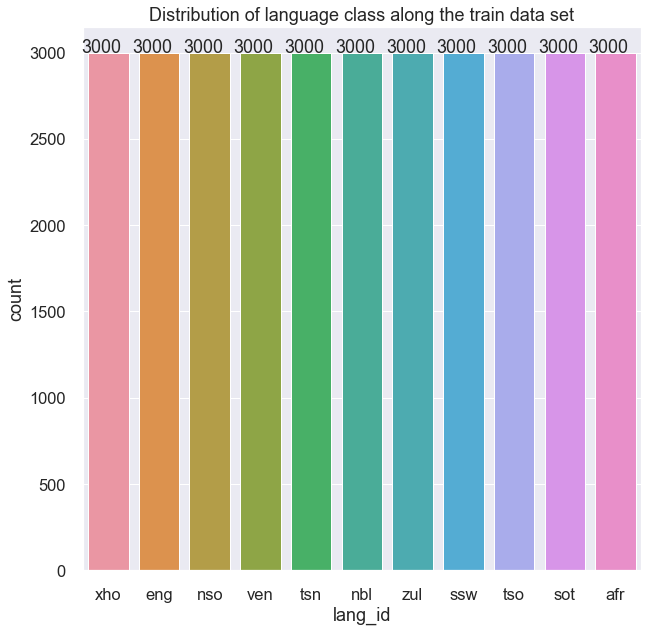

In [54]:
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,10))
graph = sns.countplot(ax=ax1,x='lang_id', data=train)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/3., height + 0.1,height ,ha="center")
    plt.title('Distribution of language class along the train data set')

In [19]:
# Taking general overview of both datasets
print("TRAIN DATA")
print("=============" + ("\n"))
print("Shape of the dataset: {}\n".format(train.shape))
print("Total Number of unique texts: {}\n".format(len(set(train["text"]))))
print("Total Number of missing values:\n{}\n\n".format(train.isnull().sum()))

print("TEST DATA")
print("=========" + ("\n"))
print("Shape of the dataset: {}\n".format(test.shape))
print("Total Number of unique texts: {}\n".format(len(set(test["text"]))))
print("Total Number of missing values:\n{}\n".format(test.isnull().sum()))

TRAIN DATA

Shape of the dataset: (33000, 2)

Total Number of unique texts: 29948

Total Number of missing values:
lang_id    0
text       0
dtype: int64


TEST DATA

Shape of the dataset: (5682, 2)

Total Number of unique texts: 5459

Total Number of missing values:
index    0
text     0
dtype: int64



<a id="nine"></a>
## 9. Data Engineering
<a href=#cont>Back to Table of Contents</a>

In [55]:
def clean_text(text):
    """
    This function uses regular expressions to remove html characters,
    punctuation, numbers and any extra white space from each text
    and then converts them to lowercase.

    Input:
    text: original text
          datatype: string

    Output:
    texts: modified text
           datatype: string
    """
    # replace the html characters with " "
    text = re.sub("<.*?>", " ", text)
    #     Removal of numbers
    #    text = re.sub(r'\d+', ' ', text)
    # will replace newline with space
    text = re.sub("\n", " ", text)
    # will convert to lower case
    text = text.lower()
    # will split and join the words
    text = " ".join(text.split())
    return text

In [56]:
# Application of the function to clean the texts
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [57]:
# Replace '.txt' with 'text file'
train["text"] = train["text"].str.replace(".txt", " text file")
test["text"] = test["text"].str.replace(".txt", " text file")

C:\Users\IZZIES~1\AppData\Local\Temp/ipykernel_4808/2305434871.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train["text"] = train["text"].str.replace(".txt", " text file")
C:\Users\IZZIES~1\AppData\Local\Temp/ipykernel_4808/2305434871.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test["text"] = test["text"].str.replace(".txt", " text file")


<a id="ten"></a>
## 10. Train - Test Split
<a href=#cont>Back to Table of Contents</a>

**Splitting Data into "X" and "y"**

In [58]:
X = train['text']
y = train['lang_id']

Allocate the portions of your data that would be used as the train set, the test sat as well as the validation data set

In [59]:
# Assign 10% of your data for use as test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

<a id="eleven"></a>
## 11. Model Building
<a href=#cont>Back to Table of Contents</a>

## Setting up Classifiers for Model Training

A classifier is a type of machine learning algorithm used to assign a class label to a data input. For the purpose of this model, we will be using the following classifiers, LogisticRegression, KNeighborsClassifier, MultinomialNB(), ComplementNB(), and SGDClassifier

In [60]:
"""
Note: Some classifiers were commented out because
they run for a very long time, 
"""
classifiers = [
    LogisticRegression(
        random_state=42, multi_class="ovr", n_jobs=1, C=1e5, max_iter=4000
    ),
    KNeighborsClassifier(n_neighbors=5),
    MultinomialNB(),
    ComplementNB(),
    SGDClassifier(
        loss="hinge", penalty="l2", alpha=1e-3, random_state=42, max_iter=5, tol=None
    ),
]


## Building Models From your  Classifiers

The function below builds a model from the classifiers already set up above. 

In [61]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline(
            [
                ("tfidf", TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ("clf", clf),
            ]
        )

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time() - start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            "F1-Macro": metrics.f1_score(y_val, predictions, average="macro"),
            "F1-Accuracy": metrics.f1_score(y_val, predictions, average="micro"),
            "F1-Weighted": metrics.f1_score(y_val, predictions, average="weighted"),
            "Execution Time": run_time,
        }
    return pd.DataFrame.from_dict(models_summary, orient="index")


In [62]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.999393,0.999394,0.999394,11.597687
ComplementNB,0.998788,0.998788,0.998788,12.058562
LogisticRegression,0.997277,0.997273,0.997273,299.623349
SGDClassifier,0.986299,0.986364,0.986335,13.521814
KNeighborsClassifier,0.965564,0.965758,0.965532,17.741993


In [63]:
# Refining the train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01)

In [64]:
# Creating a pipeline for the gridsearch
param_grid = {"alpha": [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline(
    [
        ("tfidf", TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 2))),
        (
            "mnb",
            GridSearchCV(
                MultinomialNB(),
                param_grid=param_grid,
                cv=5,
                n_jobs=-1,
                scoring="f1_weighted",
            ),
        ),
    ]
)

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        31
         eng       1.00      1.00      1.00        25
         nbl       1.00      1.00      1.00        29
         nso       1.00      1.00      1.00        32
         sot       1.00      1.00      1.00        28
         ssw       1.00      1.00      1.00        26
         tsn       1.00      1.00      1.00        32
         tso       1.00      1.00      1.00        39
         ven       1.00      1.00      1.00        35
         xho       1.00      1.00      1.00        24
         zul       1.00      1.00      1.00        29

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [49]:
submission_df = pd.DataFrame(test['index'])
submission_df['lang_id'] = tuned_mnb.predict(test['text'])
submission_df.to_csv('Last Submission.csv', index=False)

## Conclusion

Of all the models tried,Multinomial Naive Bayes classifier was the best performing. It performed very well on the training and validation datasets with an accuracy score of over 99% and F1 Macro score of over 99%. After testing the fitted model on the held-out/unseen dataset, it was able to predict the classes of languages with an F1 Score of about almost 97%.